<a href="https://colab.research.google.com/github/muralidharan-1708/DL-Projects/blob/main/Handwritten_Digit_Recognition_using_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense #Dense - for strong connectibity between nodes
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  #tp_categorical -> one hot encoding

In [ ]:
#Load the mnist datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Preprocess the data
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# or
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = Input(shape=(28, 28))
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10, activation='softmax')(rnn_layer)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)  #batch_size = to run your data via batch size(to reduce the time)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6949 - loss: 0.9053 - val_accuracy: 0.9471 - val_loss: 0.1730
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9506 - loss: 0.1588 - val_accuracy: 0.9693 - val_loss: 0.1076
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9667 - loss: 0.1064 - val_accuracy: 0.9693 - val_loss: 0.1056
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9747 - loss: 0.0805 - val_accuracy: 0.9798 - val_loss: 0.0718
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9806 - loss: 0.0619 - val_accuracy: 0.9821 - val_loss: 0.0630


In [ ]:
import numpy as np
y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_test = np.argmax(y_test, axis=1)

accuracy_score(y_test, y_pred1)

0.9809

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'y_test: 7, y_pred1 : 7')

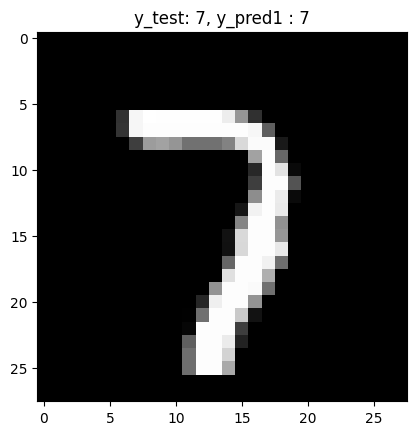

In [ ]:
plt.imshow(x_test[756], cmap='grey')
plt.title(f"y_test: {y_test[756]}, y_pred1 : {y_pred1[756]}")